# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | mugia
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | kaspiyskiy
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | coahuayana de hidalgo
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kem'
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | sambava
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | midvagur
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | an

In [4]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-joseph,-21.3667,55.6167,21.37,79,5,2.60,RE,1690258971
1,edinburgh of the seven seas,-37.0676,-12.3116,14.88,81,77,17.02,SH,1690258937
2,mugia,43.1041,-9.2179,13.84,75,46,4.33,ES,1690259481
3,iqaluit,63.7506,-68.5145,5.85,93,75,3.09,CA,1690258935
4,olonkinbyen,70.9221,-8.7187,5.16,90,100,4.84,SJ,1690258921


In [6]:
# Export the City_Data into a csv (use to initialize file directory)
os.chdir(r"c:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Modue_6 Challange Files\python-api-challenge\output_data")

current_directory = os.getcwd()

csv_path = os.path.join(current_directory, 'cities.csv')

In [9]:
#skip this part if the csv file already exists, since its what we used to export to csv in the first place
city_data_df.to_csv(csv_path, index_label="City_ID")

In [10]:
# Read saved data  (start from here after exporting)
city_data_df = pd.read_csv(csv_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,21.37,79,5,2.60,RE,1690258971
1,edinburgh of the seven seas,-37.0676,-12.3116,14.88,81,77,17.02,SH,1690258937
2,mugia,43.1041,-9.2179,13.84,75,46,4.33,ES,1690259481
3,iqaluit,63.7506,-68.5145,5.85,93,75,3.09,CA,1690258935
4,olonkinbyen,70.9221,-8.7187,5.16,90,100,4.84,SJ,1690258921


In [11]:
# Convert the 10-digit datetime to a datetime object
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Format the datetime object to the desired format
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%d/%m/%Y %H:%M')

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,21.37,79,5,2.60,RE,25/07/2023 04:22
1,edinburgh of the seven seas,-37.0676,-12.3116,14.88,81,77,17.02,SH,25/07/2023 04:22
2,mugia,43.1041,-9.2179,13.84,75,46,4.33,ES,25/07/2023 04:31
3,iqaluit,63.7506,-68.5145,5.85,93,75,3.09,CA,25/07/2023 04:22
4,olonkinbyen,70.9221,-8.7187,5.16,90,100,4.84,SJ,25/07/2023 04:22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

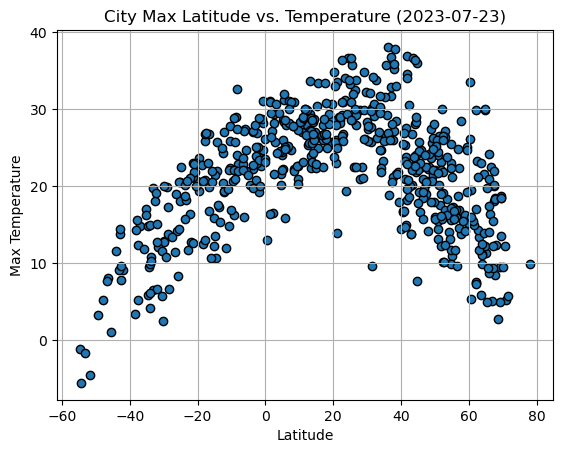

In [12]:
# Build scatter plot for latitude vs. temperature
x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']
plt.scatter(x_lat, y_temp, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

# Save the figure
csv_path2 = os.path.join(current_directory, 'Fig1.png')
plt.savefig(csv_path2)

# Show plot
plt.show()

#### Latitude Vs. Humidity

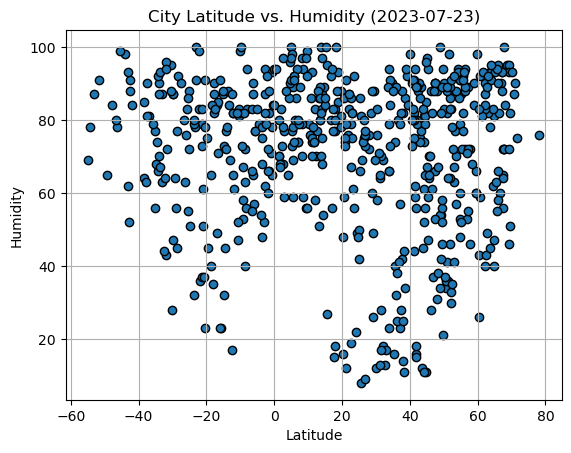

In [13]:
# Build the scatter plots for latitude vs. humidity
y_hum = city_data_df['Humidity']
plt.scatter(x_lat, y_hum, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
csv_path3 = os.path.join(current_directory, 'Fig2.png')
plt.savefig(csv_path3)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

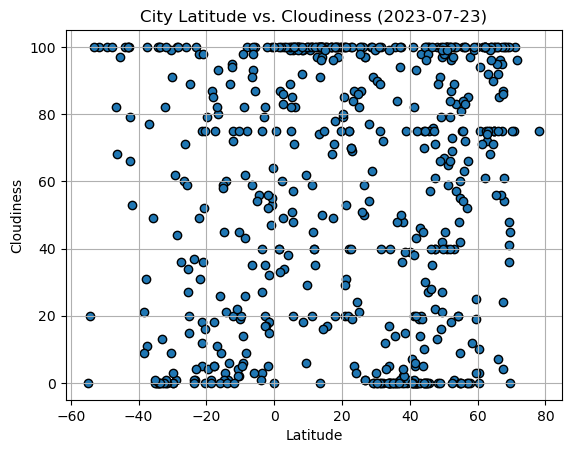

In [14]:
# Build the scatter plots for latitude vs. cloudiness
y_cloud = city_data_df['Cloudiness']
plt.scatter(x_lat, y_cloud, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
csv_path4 = os.path.join(current_directory, 'Fig3.png')
plt.savefig(csv_path4)
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

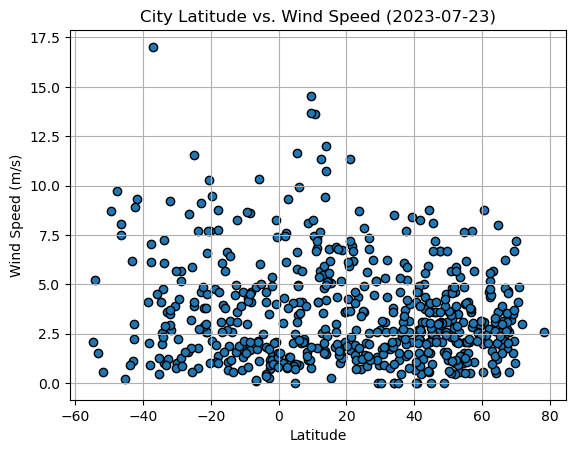

In [15]:
# Build the scatter plots for latitude vs. wind speed
y_wind = city_data_df['Wind Speed']
plt.scatter(x_lat, y_wind, edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
csv_path5 = os.path.join(current_directory, 'Fig4.png')
plt.savefig(csv_path5)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def regression_funct(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [slope * x + intercept, rvalue, pvalue, stderr, line_eq]


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mugia,43.1041,-9.2179,13.84,75,46,4.33,ES,25/07/2023 04:31
3,iqaluit,63.7506,-68.5145,5.85,93,75,3.09,CA,25/07/2023 04:22
4,olonkinbyen,70.9221,-8.7187,5.16,90,100,4.84,SJ,25/07/2023 04:22
6,kaspiyskiy,45.3929,47.3707,25.75,59,100,2.42,RU,25/07/2023 04:31
8,bethel,41.3712,-73.4140,23.75,82,20,1.54,US,25/07/2023 04:21


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,21.37,79,5,2.60,RE,25/07/2023 04:22
1,edinburgh of the seven seas,-37.0676,-12.3116,14.88,81,77,17.02,SH,25/07/2023 04:22
5,adamstown,-25.0660,-130.1015,20.51,72,15,3.92,PN,25/07/2023 04:21
7,grytviken,-54.2811,-36.5092,-5.57,78,20,5.21,GS,25/07/2023 04:21
10,blackmans bay,-43.0167,147.3167,13.74,62,100,1.13,AU,25/07/2023 04:21


###  Temperature vs. Latitude Linear Regression Plot

the r-squared value is: 0.32921322885624177


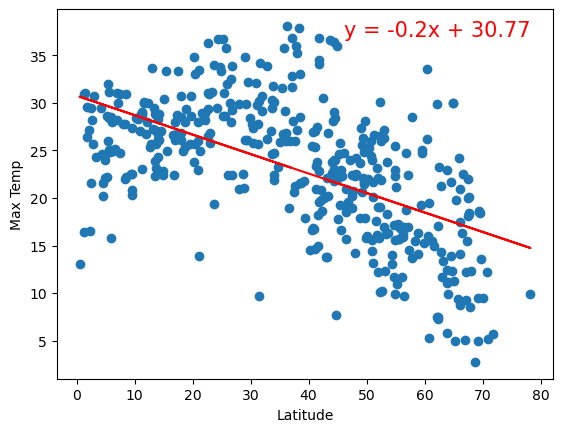

In [19]:
# Linear regression on Northern Hemisphere
x_nlat = northern_hemi_df['Lat']
y_ntemp = northern_hemi_df['Max Temp']
reg_list = regression_funct(x_nlat, y_ntemp)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_nlat, y_ntemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_nlat,line_fit,"r-")
plt.annotate(line_eq,(46,37),fontsize=15,color="red")

# Save the figure
csv_path6 = os.path.join(current_directory, 'Fig5.png')
plt.savefig(csv_path6)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

the r-squared value is: 0.6385148865354647


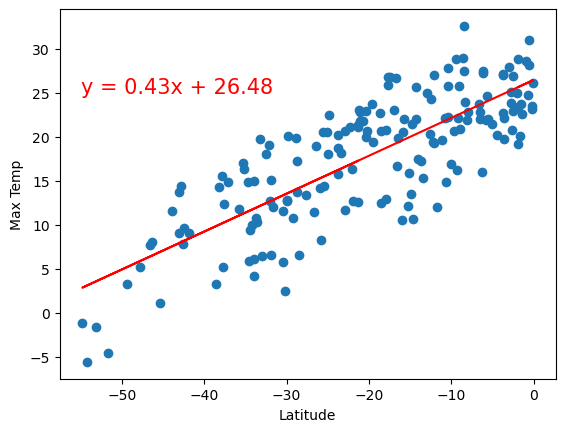

In [20]:
# Linear regression on Southern Hemisphere
x_slat = southern_hemi_df['Lat']
y_stemp = southern_hemi_df['Max Temp']
reg_list = regression_funct(x_slat, y_stemp)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_slat, y_stemp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_slat,line_fit,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")


# Save the figure
csv_path7 = os.path.join(current_directory, 'Fig6.png')
plt.savefig(csv_path7)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

**Discussion about the linear relationship:** 

Before starting, I would like to point out that, due to this workbook randomly selecting which cities it will request from the API, the resulting scatter plots, regression lines and r squared values are slightly different then what is seen in the starter code. While the distribution of datapoints are similar enough so as not to indicate anything too amiss, there are a few instances where Lines of Regression that were positive/negative in the starter code are now negative/positive here. This brings up the importance of choosing which data to use in plotting. Personally, I would have made multiple versions of these visualizations (at least 2), each one using a different randomly selected set of cities from the API. 
Also, there are more cities in the list for the Northern Hemisphere then the Souther Hemisphere, something that seems to be fairly consistent across all randomly generated datasets (there IS more land above the equator, after all). This means that the Line of Regression and R squared for Southern Hemisphere Plots would be more sensitive to change between potential datasets

Anyway, onto the Relationships above. In this case, the Linear relationships are quite simple to interperate; In the Northern Hemisphere, Latitude is negatively correlated to Temperature, while in the Southern Hemisphere it is positively correlated. Something that is evident in both plots is that the closer the lattitude gets to 0, the higher the max temperature is. Considering that the Equator, which is where the earth recieves the most light and heat from the sun on average, is located at a latitude of 0, it makes sense that we would see temperatures go up the closer to the equator you get.

The R Squared values for each Line of Regression are relatively high, indicating high probability of correlation between Temperature and Latitude. However, I would like to point out that the R squared for the Southern Hemisphere is a fair amount larger then the one for the Northern Hemisphere. Given that the inverse is true for the Starter Code, this is likely just a result of the particular set of data from the API we are using.

### Humidity vs. Latitude Linear Regression Plot

the r-squared value is: 0.0029982175102763456


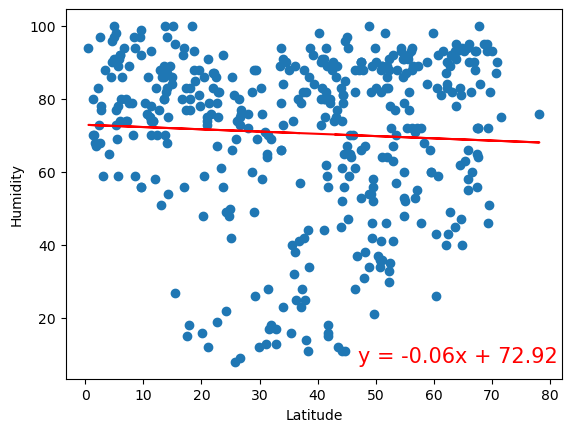

In [21]:
# Northern Hemisphere
y_nhum = northern_hemi_df['Humidity']
reg_list = regression_funct(x_nlat, y_nhum)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_nlat, y_nhum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_nlat,line_fit,"r-")
plt.annotate(line_eq,(47,8),fontsize=15,color="red")

# Save the figure
csv_path8 = os.path.join(current_directory, 'Fig7.png')
plt.savefig(csv_path8)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

the r-squared value is: 0.007340955766839625


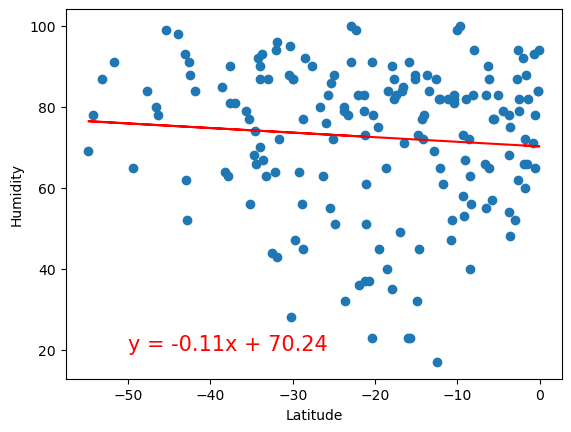

In [22]:
# Southern Hemisphere
y_shum = southern_hemi_df['Humidity']
reg_list = regression_funct(x_slat, y_shum)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_slat, y_shum)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_slat,line_fit,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Save the figure
csv_path9 = os.path.join(current_directory, 'Fig8.png')
plt.savefig(csv_path9)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

**Discussion about the linear relationship:** 

The datapoints here are more spread out then the previous two plots, with appropriately low r squared values. This indicates that there is no real correlation of note between latitude and humidity. That being said, if you were to just look at these datapoints without the red line of regression present, there DOES seem to be some minor clustering of datapoints around a central line (this is more obvious for the Southern Hemisphere), so perhaps there is some minor correlation, but not enough to suggest direct correlation. Humidity is a fairly complex phenomina with several environmental factors going into it, so it would make sense that latitude alone would not necessarily correlate

### Cloudiness vs. Latitude Linear Regression Plot

the r-squared value is: 0.012202113522893689


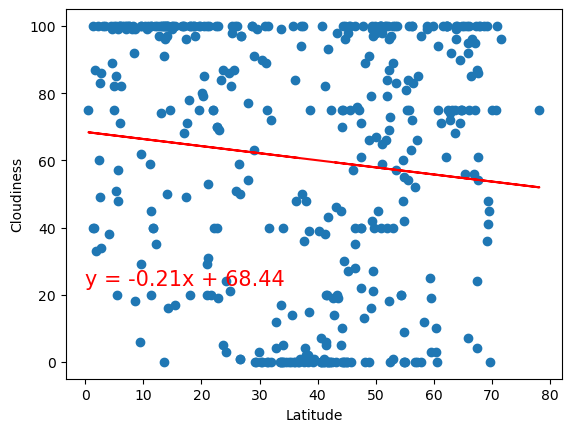

In [23]:
# Northern Hemisphere
y_ncloud = northern_hemi_df['Cloudiness']
reg_list = regression_funct(x_nlat, y_ncloud)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_nlat, y_ncloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_nlat,line_fit,"r-")
plt.annotate(line_eq,(0,23),fontsize=15,color="red")

# Save the figure
csv_path10 = os.path.join(current_directory, 'Fig9.png')
plt.savefig(csv_path10)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

the r-squared value is: 0.005511297799895488


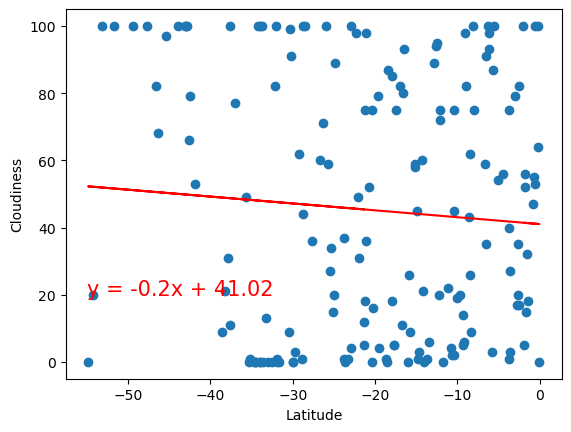

In [24]:
# Southern Hemisphere
y_scloud = southern_hemi_df['Cloudiness']
reg_list = regression_funct(x_slat, y_scloud)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_slat, y_scloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_slat,line_fit,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Save the figure
csv_path11 = os.path.join(current_directory, 'Fig10.png')
plt.savefig(csv_path11)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

**Discussion about the linear relationship:** 

The distribution of datapoints are quite spaced out, which combined with the rather low r-squared values suggests that there isnt a significant linear relationship present here in either the Northern or Southern Hemispheres. That is not to say that there isnt a pattern, however. Note how the datapoints seem to be most concentrated around 0 and 100 along the y axis, which represents how cloudy the corresponding city is at any given time. This suggests that while Latitude and Cloud Coverage are not correlated, the latter MAY correlate to some other factor that may or may not be adequitly explained by Linear Regression

### Wind Speed vs. Latitude Linear Regression Plot

the r-squared value is: 0.03504691863705902


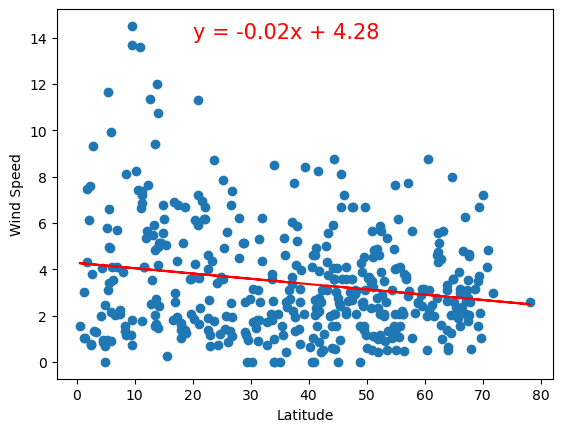

In [25]:
# Northern Hemisphere
y_nwind = northern_hemi_df['Wind Speed']
reg_list = regression_funct(x_nlat, y_nwind)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_nlat, y_nwind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_nlat,line_fit,"r-")
plt.annotate(line_eq,(20,14),fontsize=15,color="red")

# Save the figure
csv_path12 = os.path.join(current_directory, 'Fig11.png')
plt.savefig(csv_path12)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

the r-squared value is: 0.03098972033160509


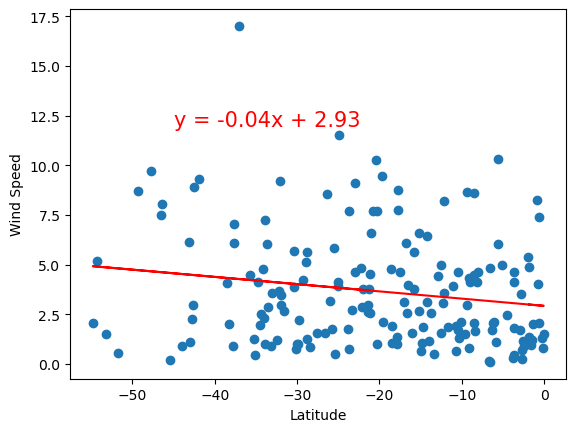

In [26]:
# Southern Hemisphere
y_swind = southern_hemi_df['Wind Speed']
reg_list = regression_funct(x_slat, y_swind)
line_fit = reg_list[0]
line_eq = reg_list[4]
r_val = reg_list[1]

plt.scatter(x_slat, y_swind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_slat,line_fit,"r-")
plt.annotate(line_eq,(-45,12),fontsize=15,color="red")

# Save the figure
csv_path13 = os.path.join(current_directory, 'Fig12.png')
plt.savefig(csv_path13)

# Show plot
print(f"the r-squared value is: {r_val**2}")
plt.show()

**Discussion about the linear relationship:** 

The R Squared here suggests a fairly weak correlation between Windspeed and Latitude. However, the Datapoints seem to be fairly clustered around the Line of Regression. However, while the datapoints do FOLLOW the Line of Regression, they are still fairly spread out from it. Given that the y value is representing Wind Speed, I have a theory for why the scatter plots look like this. In both the Northern and Southern Hemispheres, wind speeds tend not to exceed 7 or 8 m/s (save for a few outliers), speeds that the National Weather Service classify as "Moderate Breeze" and "Fresh Breeze" respecively. Wind speeds past this point are considered "strong", with 17 m/s being the point when wind is considered "Gale Force". Now this is just conjecture, but based on my experience most places do not seem to experience more than anything more than a breeze at any given time, and Gale Force Winds certaintly arent all that common. Therefore, I believe that while there isnt too much of a linear correlation present with these scatterplots, the plots DO seem to represent something else; the average wind speed of the earth